# Predicting Airbnb Prices in New York

## The Programme

### What does the programme do? 

We create a model to predict the prices of Airbnb listings in NYC. We base our prediction on a dataset from Kaggle, which suited our parameter-requirements and was sufficiently large. After running the programme the user has the option to visualise one of the three models which were used to attempt an accurate prediction for prices. 

### Programme description 

#### Data
We took the dataset from the following source: 
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
The dataset describes listing activity for the year 2019 in New York City. The dataset includes information on: Listing id, name of the listing, host id, name of the host, neighbourhood (-group), latitude, longitude, room type, and price. The dataset encompasses a total of 47'906 observations. 
We took particular interest to the following variables: neighbourhood group, latitude, longitude, room type, price.  

#### Preparation 
As a first step we import the libraries needed for the models. We then import the dataset and inspect it. In preparation for training our model, we clean up our data by removing outliers as well as variables which we deem unimportant. Additionally, we also get rid off listings with a price of zero.
Further, we visualise the dependent variable price to see how it correlates with other variables such as room type. Additionaly, we plot the listings on a map of NYC by using the variables latitude and longitude. This map shows how the listings are distributed across the city and also how the prices are in different neighbourhoods.

#### Prediction
Our first model will make use of a linear regression. We therefore start off by defining the dependent as well as independent variables. To avoid over-fitting our model, we split our dataset in a training and a test dataset using a 30/70 split. We then use the training data to train our linear regression model. Having trained the model, we then use it to make our price prediction. We then test the validity of our prediction by plotting the prediction to the actual data. Judging by our results it would appear our linear regression is not the most suitable option as it is rather inaccurate. 

In order to remedy the shortcomings inherent in our linear regression model, we attempt to make a better prediction using a decision tree regressor. 
We start off by importing the decision tree regressor from an external library. We then fit our model to the regressor to train the decision tree. This was done in the same manner as for the linear regression earlier. The model is then used to make a price prediction based on the test data. This model also appears to not work very well. In an attempt to improve the model’s predictive performance, we decide to optimise the hyperparameters with GrdSearchCV. While not perfect, the decision tree with optimised hyperparameters does perform markedly better than before. 

#### Comparison and Visualisation of Results
At last, we compare the three models on the basis of their MAPE (median average percentage error) and their RMSE (root mean squared error). These two performance indicators are lower for well performing models. Not surprisingly, the decision tree with optimised hyperparameters is performing the best. Lastly, the user can decide which model they would like to visualise. The final visualisation is done in a way similar to a heatmap using a map of the respective area.

#### How to run 
We did our project in a Jupyter notebook since it allows to directly execute specific lines of code and incorporate visualisations. In order to run the programme locally, one should download this script as well as the dataset. The two documents should be in the same folder on the user's computer. The notebook should then be opened, for example using Jupyter Notebook with Anaconda. One can then either run the code in full by pressing run or may choose to run each cell separately (taking note of the order in which they are run in as this will affect the output).

### Contact
This code was written by Simon Jeeves, Emilia Lautz and Nick Postnow. In case of question, send us an e-mail: simonalexander.jeeves@student.unisg.ch, emiliaisabelsophie.lautz@student.unisg.ch, nick.postnow@student.unisg.ch

## Preparation

### Import Standard Libraries

In [59]:
import pandas as pd
  # import pandas for data manipulation and analysis

import numpy as np
  # import numpy for working with multidimensional data

import matplotlib.pyplot as plt
  # import matplotlib.pyplot for visualisation

import seaborn as sns
  # import seaborn for visualisation

### Import Data

In [6]:
# Import data for airbnb listings in NYC

airbnb = pd.read_csv("AB_NYC_2019.csv")

In [7]:
# Inspect the first five rows of the data set

airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Pre-Process Data

In [8]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Not all of the variables are important for the price prediction. We will delete the ones that probably have no impact on the price of an airbnb listing in NYC.

In [9]:
# Delete variables

airbnb_data = airbnb.drop(["id", "name", "host_name", "host_id", "last_review", "reviews_per_month", "calculated_host_listings_count"], axis = 1)

In [10]:
# Have a look at the independent variable "price"

airbnb_data["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Some observations have a value of 0 for the price variable. Yet, logically it does not make sense that a listing on AirBnB has a price that is not positive. Thus, we will drop these obersvations. 

In [11]:
airbnb_data["price"] = airbnb_data["price"].replace(0, np.nan)
airbnb_data = airbnb_data.dropna()
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48884 non-null  object 
 1   neighbourhood        48884 non-null  object 
 2   latitude             48884 non-null  float64
 3   longitude            48884 non-null  float64
 4   room_type            48884 non-null  object 
 5   price                48884 non-null  float64
 6   minimum_nights       48884 non-null  int64  
 7   number_of_reviews    48884 non-null  int64  
 8   availability_365     48884 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.7+ MB


Our dataset has no missing values, so there is no need for imputation. Before we train the model, we will visualise the data and get some statistics on the variables of interest.

### Visualisation and Statistics of Important Variables

We want to understand how the dependent variable - price - is distributed. For instance are we interested in how price and room type are correlated. One would guess that a full apartment is likely to be more expensive than a shared room. A visualisation might give more insights.

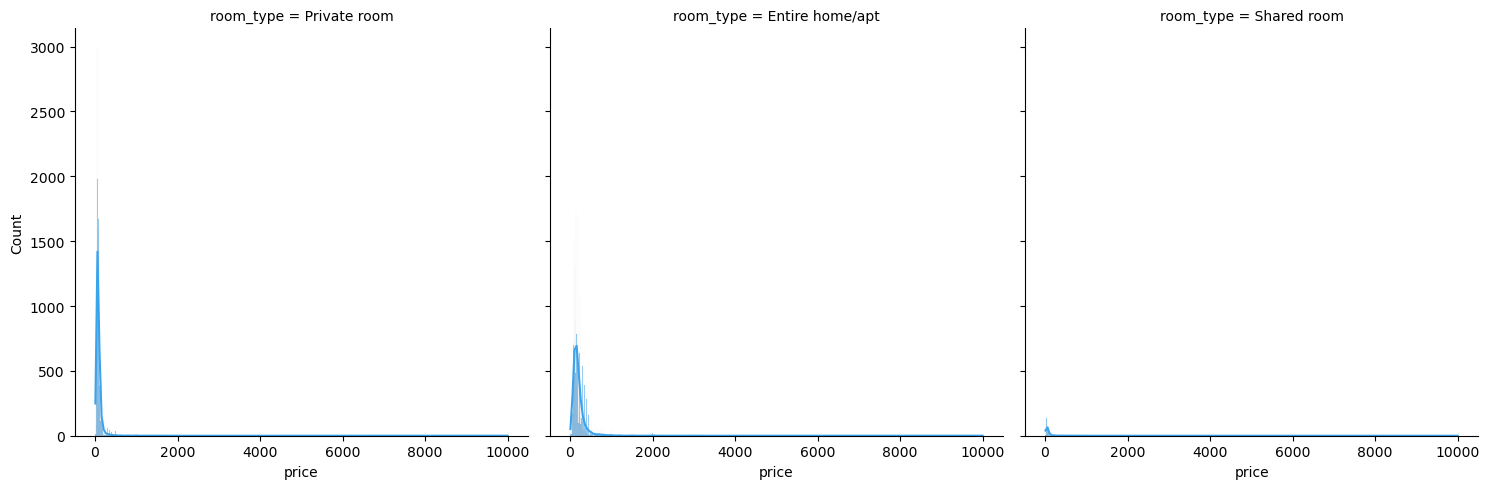

In [20]:
# Distribution of the price variable

sns.displot(data=airbnb_data, x="price", kde=True,col="room_type",color = "#3ba3ec")
plt.show(sns)

The price is very unevenly distributed. Seemingly, only very few listings have a price exceeding ca. 500 USD. Hence, these outliers might affect the quality of the prediction. Therefore it might be helpful to delete the 10% of all observations with the highest values for the variable "price".

In [13]:
# Delete the observations that have the 10% highest value for the variable "price"

airbnb_cleaned = airbnb_data.nsmallest(round(len(airbnb_data)*0.9), 'price')
airbnb_cleaned["price"].describe()

count    43996.000000
mean       112.324439
std         58.500502
min         10.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        269.000000
Name: price, dtype: float64

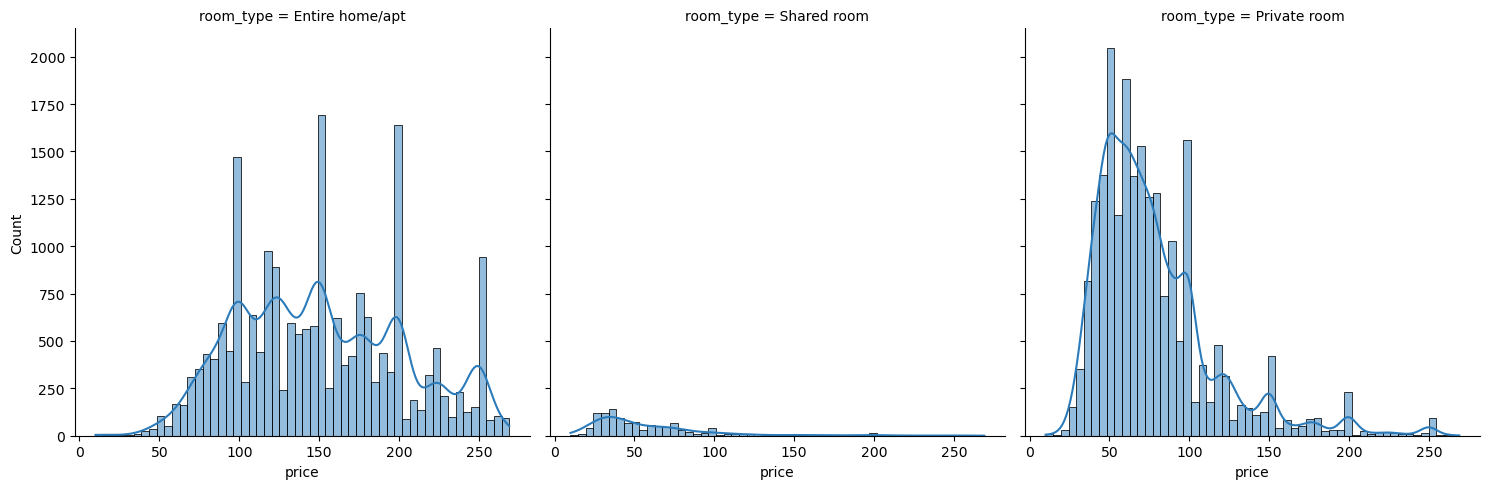

In [19]:
# Distribution of the price variable after deletion of the 10% most expensive listings

sns.displot(data=airbnb_cleaned, x="price", kde=True,col="room_type",color = "#2b7bba")
plt.show(sns)

By deleting the 10% most expensive listings, we were able to remove outliers from our dataset and can now get a better  picture of the price distribution. On average, entire apartments are the most expensive room type. We will create boxplots to get summary statistics on the price.

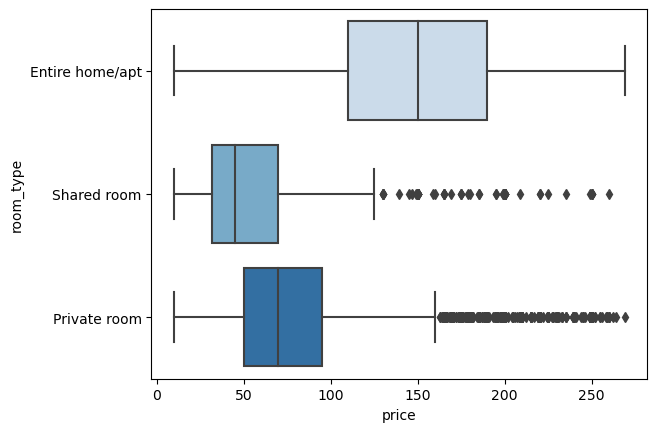

In [21]:
# Boxplots for "price" given different room types

sns.boxplot(data=airbnb_cleaned, x="price", y="room_type",palette = "Blues")
plt.show(sns)

In [22]:
# Summary statistics of the price variable, grouped by room_type

airbnb_cleaned.groupby('room_type')['price'].describe()

count        mean        std   min    25%    50%    75%  \
room_type                                                                    
Entire home/apt  21013.0  151.270404  51.980043  10.0  110.0  150.0  190.0   
Private room     21854.0   77.689347  37.478881  10.0   50.0   70.0   95.0   
Shared room       1129.0   57.890168  38.385184  10.0   32.0   45.0   70.0   

                   max  
room_type               
Entire home/apt  269.0  
Private room     269.0  
Shared room      260.0

On average, an entire apartment has a price of 151 USD/night, whilst a private room and a shared room are less expensive with average prices of 78 USD/night and 58 USD/night. The most expensive listing costs 269 USD/night and the least expensive listing has a price of 10 USD/night.

In [23]:
# Summary statistics of the price variable, grouped by neighbourhood

price_neighbourhood = airbnb_cleaned.groupby('neighbourhood_group')['price'].describe()
price_neighbourhood.head()

count        mean        std   min   25%    50%    75%  \
neighbourhood_group                                                             
Bronx                 1056.0   74.700758  40.314162  10.0  45.0   65.0   95.0   
Brooklyn             18945.0  101.143996  53.866030  10.0  60.0   89.0  133.0   
Manhattan            18155.0  134.739686  59.141661  10.0  87.0  125.0  180.0   
Queens                5485.0   85.854148  47.687832  10.0  50.0   71.0  103.0   
Staten Island          355.0   83.549296  47.290719  13.0  50.0   72.0  100.0   

                       max  
neighbourhood_group         
Bronx                250.0  
Brooklyn             269.0  
Manhattan            269.0  
Queens               268.0  
Staten Island        250.0

On average, the listings in Manhatten are the most expensive with an average price of 135 USD/night. The least expensive listings can be found in the Bronx with an average price of 75 USD/night. Below, you will find a plot that visualises the average price per neighbourhood.

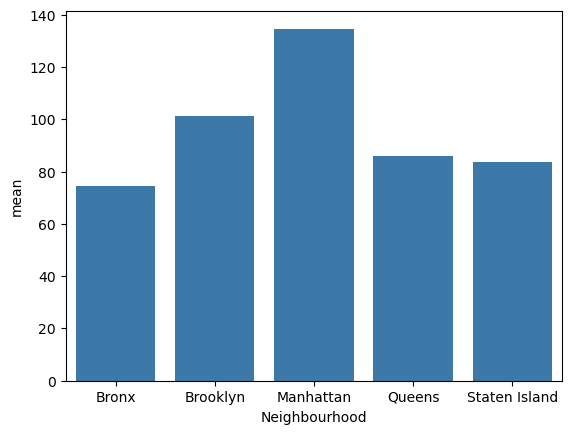

In [25]:
# Plot the mean price for the listings in one neighbourhood
price_neighbourhood["Neighbourhood"] = price_neighbourhood.index
sns.barplot(data=price_neighbourhood, x="Neighbourhood", y="mean", color="#2b7bba")
plt.show(sns)

Further, we can map the locations of the airbnb listings by plotting longitude and latitude against each other. This will allow us to see, where the listings are located and how prices are distributed throughout NYC.

In [26]:
import plotly.express as px

fig = px.scatter_mapbox(airbnb_cleaned,
    lon = "longitude", 
    lat = "latitude", 
    color = "price", 
    zoom = 9.5)


fig.update_layout(mapbox_style = "open-street-map")
fig.update_layout(margin = {"r": 0, "t": 0, "l": 0, "b": 0})


fig.update_layout(
    title = "Airbnb listings in NYC")

fig.show()

## Prediction: Linear Regression

### Define the independent variables X and the dependent variable y

In [27]:
y = np.log(airbnb_cleaned["price"]+1)
X = airbnb_cleaned.drop(["price","neighbourhood_group"], axis = 1)

In [28]:
# Create dummy variables to enable the usage of character variables

X = pd.get_dummies(X, drop_first = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43996 entries, 2860 to 38193
Columns: 225 entries, latitude to room_type_Shared room
dtypes: float64(2), int64(3), uint8(220)
memory usage: 12.3 MB


### Create Training and Test Data

We will split the entire dataset into training and test data to prevent overfitting. The model will be trained using 70% of the full dataset whilst the prediction will be made on the remaining 30%. We use random_state = 1 so that each time the code is executed, the split will create the same two datasets. Thus, the code is replicable.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

### Train our Model: Linear Regression

The first model that we use to predict prices of airbnb listings in NYC is a linear regression.

In [30]:
# Import statsmodels.api
import statsmodels.api as sm

# Instantiate model 
X_train = sm.add_constant(X_train)
linear_regression = sm.OLS(y_train, X_train)

# Fit model to data 
linear_regression = linear_regression.fit()

# Print results
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     196.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:52:21   Log-Likelihood:                -10973.
No. Observations:               30797   AIC:                         2.239e+04
Df Residuals:                   30574   BIC:                         2.425e+04
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

The OLS model has an adjusted R^2 of 0.585. Further, we can extract whether specific variables have a positive or negative relationship with the price of the listing. If the coefficient is neagtive, the variable is negatively correlated with the price. For instance, we can see that private rooms as well as shared rooms are less expensive than entire apartments. 

### Predict the price for the test data

In [31]:
# Make prediciton 

X_test = sm.add_constant(X_test)
y_pred_linear = linear_regression.predict(X_test)

In [32]:
y_pred_linear.describe()

count    13199.000000
mean         4.588567
std          0.414114
min          2.838661
25%          4.212293
50%          4.589214
75%          4.956911
max          6.083888
dtype: float64

### Plot the actual values against the predicted values

We evaluate the model performance with an actual vs. predicted plot. The closer the points are to the 45° line, the better the prediction performs.

In [33]:
def actual_vs_predicted_plot(y_test, y_pred):
  min_value=np.array([y_test.min(), y_pred.min()]).min()
  max_value=np.array([y_test.max(), y_pred.max()]).max()
  fig, ax = plt.subplots(figsize=(10,5))
  ax.scatter(y_test,y_pred, color="#2b7bba")
  ax.plot([min_value,max_value], [min_value, max_value], lw=2, color="#d82c20")
  ax.set_title("Actual vs Predicted Plot")
  ax.set_xlabel('Actual')
  ax.set_ylabel('Predicted')
  plt.show()

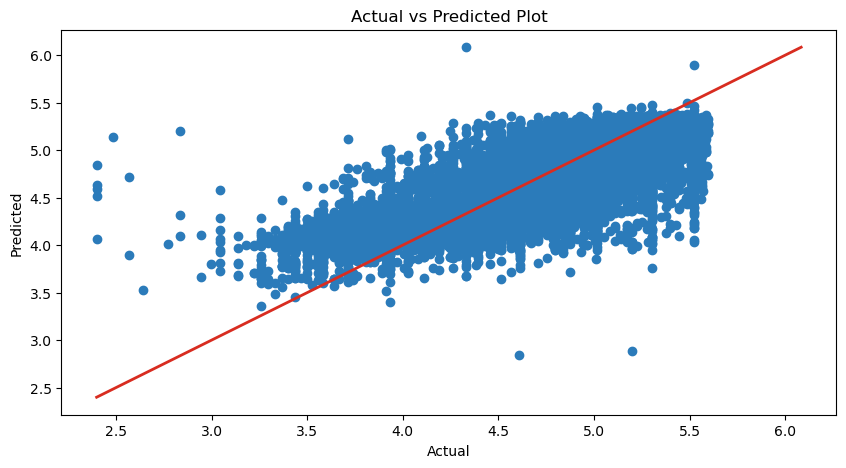

In [34]:
actual_vs_predicted_plot(y_test, y_pred_linear)

As seen in the actual vs. predicted plot, the prediction is not very accurate. Therefore, we want to use a different model to achieve a better fit. Thus, we will use a decision tree regressor. Similarly as with the linear regression, we will first train the model using training data and then run a prediction on the test data.

## Prediction: Decision Tree Regressor

### Train our Model: Decision Tree Regressor

In [35]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate model 
tree_reg = DecisionTreeRegressor(random_state = 1, max_depth = 5, min_samples_leaf = 10)

#fit model to data
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=1)

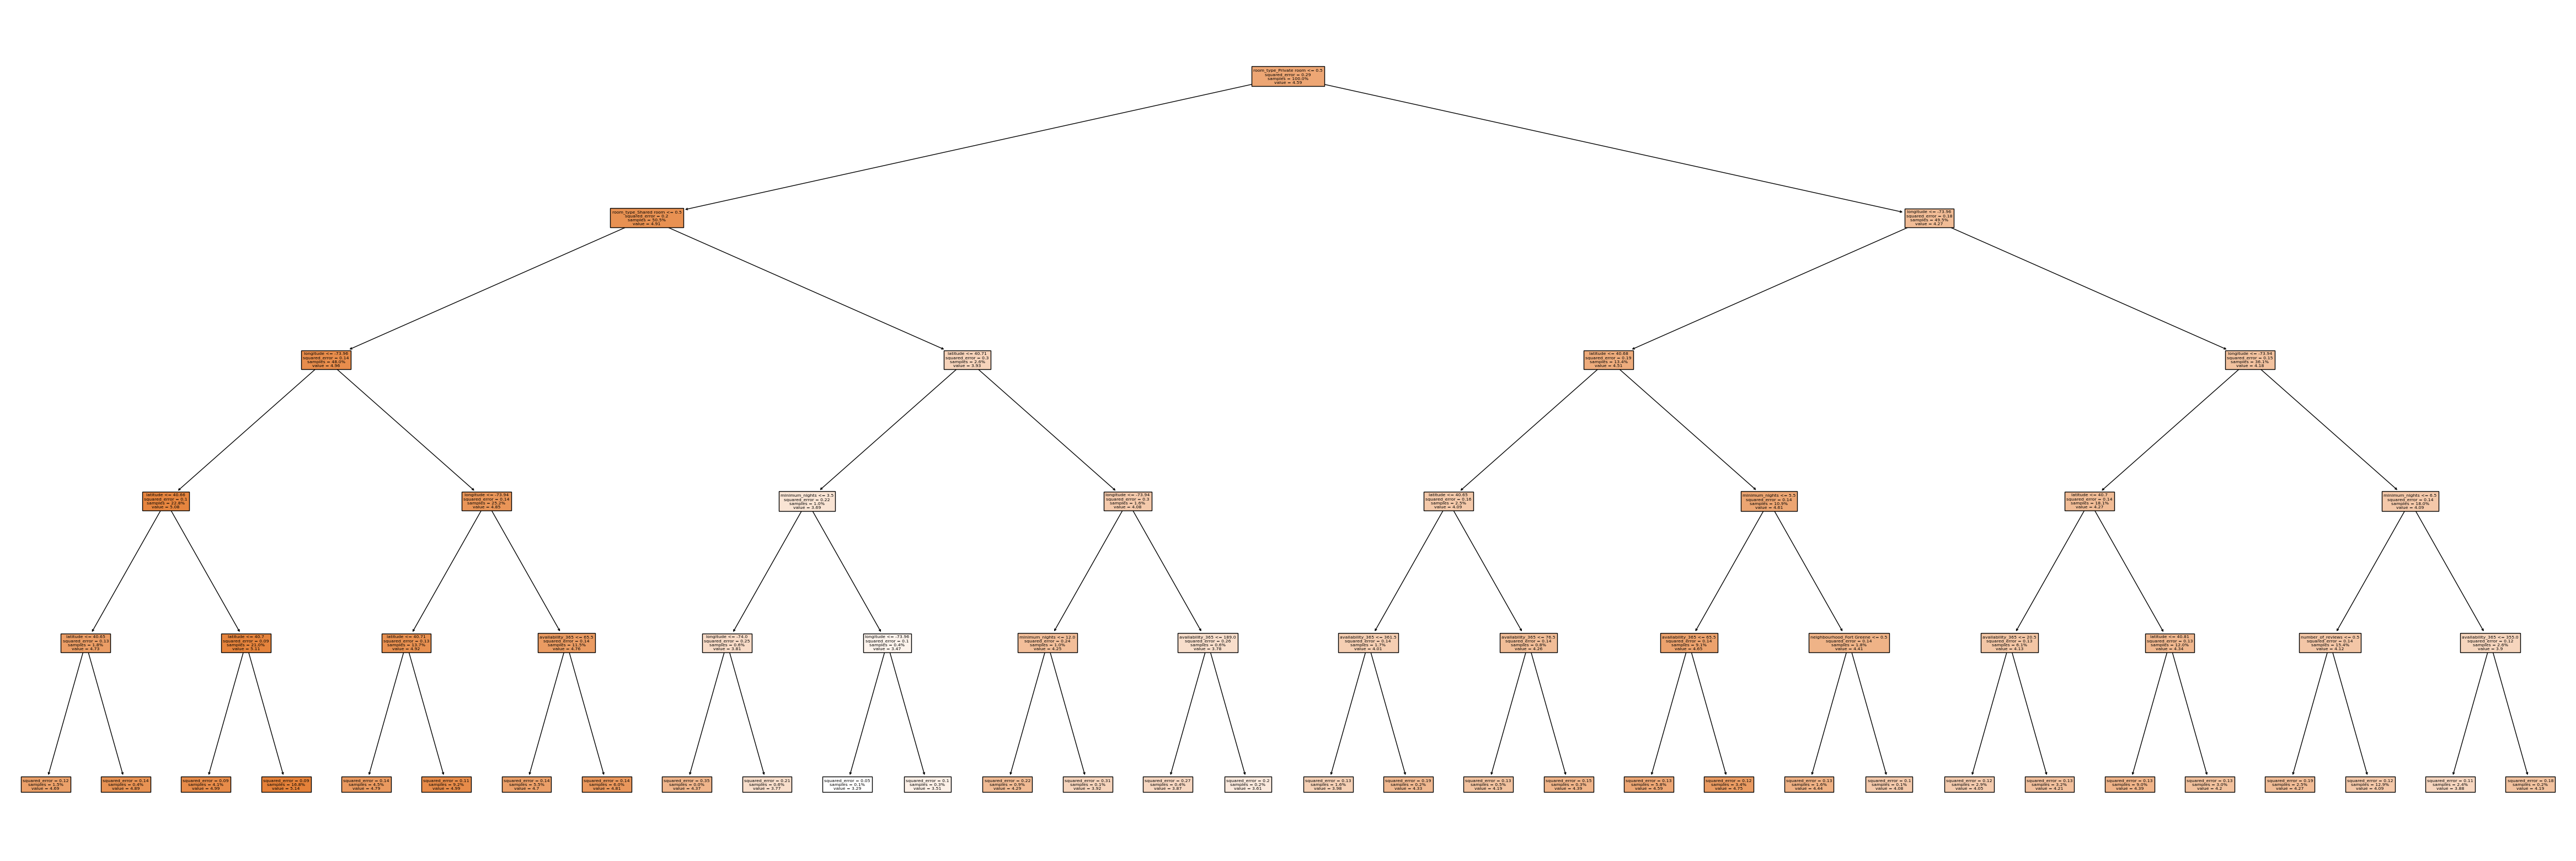

In [43]:
# Visualise the decision tree
from sklearn import tree

def plot_tree_classification(treemodel, X):
    fig = plt.figure(figsize=(60,20))
    _ = tree.plot_tree(treemodel,filled=True,
                       class_names=['0','1'],
                       feature_names = X.columns,
                       proportion=True,precision=2)
  
plt.show(plot_tree_classification(tree_reg, X_train))

### Predict the price for the test data

In [44]:
# Prediction

y_pred_tree = tree_reg.predict(X_test)

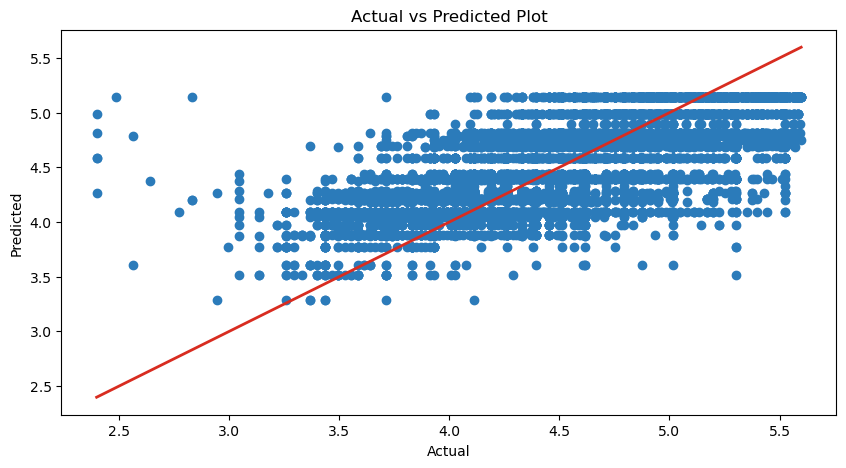

In [45]:
actual_vs_predicted_plot(y_test, y_pred_tree)

The Actual vs. Predicted Plot shows that the model for our prediction is not performing well. Some points lie on horizontal lines which might be due to the hyperparameters that we defined. We gave the model a max_depth of 5, meaning that the tree cannot split more than five times. The performance might be improved if this number is increased. Thus, we will optimise the hyper-parameters with a grid search. Grid search uses possible values for the hyper-parameters that need to be optimised and tries out all possible combinations. Then, it returns the values that give the best prediction.

### Optimise Hyper-Parameters with GridSearchCV

In [46]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV 

# Optimise the hyper-parameters "max_depth" and "min_samples_leaf"

parameters = {"max_depth": range (1,30),
              "min_samples_leaf":[1, 10, 20, 30 , 50 ,100]}
tree_CV = GridSearchCV(DecisionTreeRegressor(random_state = 1), parameters, cv = 5)

In [47]:
# Fit the optimised model to the data

tree_CV.fit(X_train, y_train)
tree_CV.best_params_

{'max_depth': 9, 'min_samples_leaf': 50}

Therefore, the best hyper-parameters are a max_depth of 5 and min_samples_leaf of 50.

### Predict the price with the optimised hyperparameters

In [48]:
y_pred_tree_opt = tree_CV.predict(X_test)

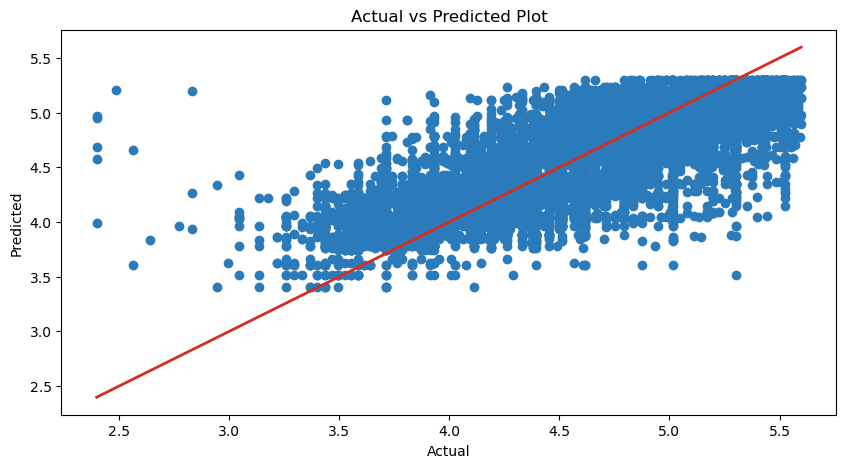

In [49]:
actual_vs_predicted_plot(y_test, y_pred_tree_opt)

Compared to the not-optimised decision tree, the model performs well. However, it is difficult to compare the model performance only by looking at the plot. Thus, we will calculate two performance indicators - MAPE and RMSE. The lower they are, the better the model performance. 

## Compare the Performance of the three models

In [50]:
# Calculate MAPE for the three models

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((np.exp(y_true) - np.exp(y_pred)) / np.exp(y_true))) * 100

# Formula retrieved from: https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn/294069#294069

In [51]:
mape_linear = mean_absolute_percentage_error(y_test, y_pred_linear)
mape_tree = mean_absolute_percentage_error(y_test, y_pred_tree)
mape_tree_opt = mean_absolute_percentage_error(y_test, y_pred_tree_opt)

In [52]:
# Calculate the RMSE (root mean squared error) for the three models

def root_mean_squared_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    residuals = np.exp(y_true) - np.exp(y_pred)
    return np.sqrt(np.mean(residuals**2))

In [53]:
rmse_linear = root_mean_squared_error(y_test, y_pred_linear)
rmse_tree = root_mean_squared_error(y_test, y_pred_tree)
rmse_tree_opt = root_mean_squared_error(y_test, y_pred_tree_opt)

In [54]:
# Print the MAPE and RMSE in a dataframe
mape_rmse = pd.DataFrame(np.array([["Linear Regression",mape_linear, rmse_linear], ["Decision Tree",mape_tree, rmse_tree], ["Optimised Decision Tree",mape_tree_opt, rmse_tree_opt]]),
                   columns=["Model","MAPE", "RMSE"])
mape_rmse.set_index("Model")

MAPE                RMSE
Model                                                          
Linear Regression        27.830980650735277   39.87431963683727
Decision Tree            28.552127255343024  40.358537767883526
Optimised Decision Tree   27.12478310240689   38.85057879800296

RMSE and MAPE are the lowest for the optimised decision tree. Therefore, this model seems to give the best prediction of the price of airbnb listings in NYC.

## Interactive Visualisation of the Prediction

We want to visualise the predicted prices using the same map visualisation that we used in the beginning. Since there are three different predictions, we will let the user choose which model prediction should be visualised: linear regression, decision tree regressor or decision tree regressor with optimised hyperparameters.

In [55]:
model_options = ["linear regression","decision tree regressor","optimised decision tree regressor"]
model_options

['linear regression',
 'decision tree regressor',
 'optimised decision tree regressor']

In [56]:
def map_with_predicted_price(price):
  fig = px.scatter_mapbox(airbnb_cleaned,
      lon = X_test["longitude"], 
      lat = X_test["latitude"], 
      color = price, 
      zoom = 9.5)
  fig.update_layout(mapbox_style = "open-street-map")
  fig.update_layout(margin = {"r": 0, "t": 0, "l": 0, "b": 0})
  fig.update_layout(
      title = "Airbnb listings in NYC with Predicted Prices")
  fig.show()

In [57]:
model_options = ["linear regression","decision tree regressor","optimised decision tree regressor"]

option = input("Which prediction do you want to visualise?\n 1) Linear Regression\n 2) Decision Tree Regressor\n 3) Optimised Decision Tree Regressor\n ")
while option.lower() not in model_options:
  option = input("Please pick one of the three models: ")
  
print("You chose to visualise the prediction based on the model "+option+".")

Which prediction do you want to visualise?
 1) Linear Regression
 2) Decision Tree Regressor
 3) Optimised Decision Tree Regressor
 Linear Regression
You chose to visualise the prediction based on the model Linear Regression.


In [58]:
if option.lower() == "linear regression":
  map_with_predicted_price(y_pred_linear)
elif option.lower()== "decision tree regressor":
  map_with_predicted_price(y_pred_tree)
elif option.lower() == "optimised decision tree regressor":
  map_with_predicted_price(y_pred_tree_opt)
else: 
  pass